In [1]:
import pandas as pd

/Users/hiromi/.pyenv/versions/3.8.10/lib/python3.8/site-packages/pandas/compat/__init__.py:97: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [2]:
df_rent = pd.read_csv('Metro_ZORI_AllHomesPlusMultifamily_SSA.csv')

In [3]:
# df_rent.info()

In [4]:
df_rent.shape

(106, 92)

In [5]:
df_rent[df_rent['2014-01'].isna()]

,RegionID,RegionName,SizeRank,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,2014-07,...,2020-08,2020-09,2020-10,2020-11,2020-12,2021-01,2021-02,2021-03,2021-04,2021-05
22,394982,"Pittsburgh, PA",22,NaN,1006.0,1010.0,1014.0,1018.0,1021,1025,...,1188,1190,1192,1195,1197,1200,1202,1205,1207,1210.0
45,395022,"Richmond, VA",45,NaN,1040.0,1045.0,1049.0,1053.0,1057,1061,...,1305,1311,1317,1323,1329,1335,1341,1347,1353,1359.0
70,394521,"Dayton, OH",70,NaN,802.0,803.0,804.0,805.0,806,808,...,1021,1027,1033,1040,1046,1053,1059,1066,1072,1079.0
71,394486,"Columbia, SC",72,NaN,936.0,940.0,944.0,948.0,951,954,...,1162,1170,1179,1187,1196,1205,1213,1222,1231,1241.0
81,395224,"Wichita, KS",82,NaN,736.0,739.0,741.0,744.0,746,749,...,828,832,835,839,842,845,849,852,856,859.0
92,395245,"Youngstown, OH",93,NaN,585.0,587.0,588.0,590.0,591,593,...,703,708,713,718,722,727,732,737,741,746.0
93,394352,"Augusta, GA",94,NaN,909.0,911.0,912.0,913.0,914,916,...,1114,1122,1130,1138,1146,1154,1162,1170,1178,1186.0


In [6]:
df_rent.RegionName.unique()

array(['United States', 'New York, NY',
       'Los Angeles-Long Beach-Anaheim, CA', 'Chicago, IL',
       'Dallas-Fort Worth, TX', 'Philadelphia, PA', 'Houston, TX',
       'Washington, DC', 'Miami-Fort Lauderdale, FL', 'Atlanta, GA',
       'Boston, MA', 'San Francisco, CA', 'Detroit, MI', 'Riverside, CA',
       'Phoenix, AZ', 'Seattle, WA', 'Minneapolis-St Paul, MN',
       'San Diego, CA', 'St. Louis, MO', 'Tampa, FL', 'Baltimore, MD',
       'Denver, CO', 'Pittsburgh, PA', 'Portland, OR', 'Charlotte, NC',
       'Sacramento, CA', 'San Antonio, TX', 'Orlando, FL',
       'Cincinnati, OH', 'Cleveland, OH', 'Kansas City, MO',
       'Las Vegas, NV', 'Columbus, OH', 'Indianapolis, IN',
       'San Jose, CA', 'Austin, TX', 'Virginia Beach, VA',
       'Nashville, TN', 'Providence, RI', 'Milwaukee, WI',
       'Jacksonville, FL', 'Memphis, TN', 'Oklahoma City, OK',
       'Louisville-Jefferson County, KY', 'Hartford, CT', 'Richmond, VA',
       'New Orleans, LA', 'Buffalo, NY', 'Raleig

In [7]:
df_rent = df_rent.set_index('RegionName')

*pick 20 metro areas + US along with LinkedIn workforce report

In [8]:
df_metro = df_rent.loc[['United States', 'Atlanta, GA', 'Austin, TX','Boston, MA','Chicago, IL','Cleveland, OH', 'Dallas-Fort Worth, TX', 'Denver, CO', 'Detroit, MI', 'Houston, TX', 'Los Angeles-Long Beach-Anaheim, CA', 'Miami-Fort Lauderdale, FL',  'Minneapolis-St Paul, MN','Nashville, TN', 'New York, NY', 'Philadelphia, PA',  'Phoenix, AZ',  'San Francisco, CA', 'Seattle, WA', 'St. Louis, MO',  'Washington, DC'  ]]

In [9]:
df_metro = df_metro.drop(columns= ['RegionID', 'SizeRank'] )

In [10]:
df_metro.head()

,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,2014-07,2014-08,2014-09,2014-10,...,2020-08,2020-09,2020-10,2020-11,2020-12,2021-01,2021-02,2021-03,2021-04,2021-05
RegionName,,,,,,,,,,,,,,,,,,,,,
United States,1340.0,1347.0,1354.0,1362.0,1369.0,1376,1383,1390,1397,1404,...,1703,1707,1710,1714,1718,1722,1727,1731,1736,1740.0
"Atlanta, GA",1110.0,1115.0,1120.0,1125.0,1130.0,1135,1140,1145,1150,1155,...,1571,1582,1594,1606,1619,1631,1644,1657,1670,1684.0
"Austin, TX",1171.0,1181.0,1190.0,1199.0,1207.0,1216,1225,1234,1242,1251,...,1484,1487,1490,1495,1500,1504,1510,1515,1521,1527.0
"Boston, MA",2008.0,2015.0,2022.0,2030.0,2037.0,2044,2051,2058,2065,2072,...,2384,2375,2366,2358,2349,2341,2334,2326,2318,2312.0
"Chicago, IL",1454.0,1459.0,1465.0,1471.0,1476.0,1481,1487,1492,1497,1503,...,1686,1683,1681,1678,1676,1674,1672,1670,1668,1666.0


In [11]:
df_metro['yoy'] = round(df_metro['2021-05'] / df_metro['2020-05']*100-100 , 1)
df_metro['2yoy'] = round(df_metro['2021-05'] / df_metro['2019-05']*100-100 , 1)
df_metro['5yoy'] = round(df_metro['2021-05'] / df_metro['2016-05']*100-100 , 1)
df_metro['7yoy'] = round(df_metro['2021-05'] / df_metro['2014-05']*100-100 , 1)
df_metro.head()

,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,2014-07,2014-08,2014-09,2014-10,...,2020-12,2021-01,2021-02,2021-03,2021-04,2021-05,yoy,2yoy,5yoy,7yoy
RegionName,,,,,,,,,,,,,,,,,,,,,
United States,1340.0,1347.0,1354.0,1362.0,1369.0,1376,1383,1390,1397,1404,...,1718,1722,1727,1731,1736,1740.0,2.4,4.4,15.4,27.1
"Atlanta, GA",1110.0,1115.0,1120.0,1125.0,1130.0,1135,1140,1145,1150,1155,...,1619,1631,1644,1657,1670,1684.0,8.9,12.7,33.1,49.0
"Austin, TX",1171.0,1181.0,1190.0,1199.0,1207.0,1216,1225,1234,1242,1251,...,1500,1504,1510,1515,1521,1527.0,2.9,4.1,12.9,26.5
"Boston, MA",2008.0,2015.0,2022.0,2030.0,2037.0,2044,2051,2058,2065,2072,...,2349,2341,2334,2326,2318,2312.0,-4.4,-4.5,4.8,13.5
"Chicago, IL",1454.0,1459.0,1465.0,1471.0,1476.0,1481,1487,1492,1497,1503,...,1676,1674,1672,1670,1668,1666.0,-1.8,-1.3,5.2,12.9


In [12]:
df_metro['2021-05'].nlargest(10)

RegionName
San Francisco, CA                     2842.0
New York, NY                          2546.0
Los Angeles-Long Beach-Anaheim, CA    2475.0
Boston, MA                            2312.0
Washington, DC                        2021.0
Miami-Fort Lauderdale, FL             2011.0
Seattle, WA                           1858.0
United States                         1740.0
Denver, CO                            1709.0
Atlanta, GA                           1684.0
Name: 2021-05, dtype: float64

In [13]:
df_metro.at['San Francisco, CA', 'yoy']

-7.8

<AxesSubplot:xlabel='RegionName'>

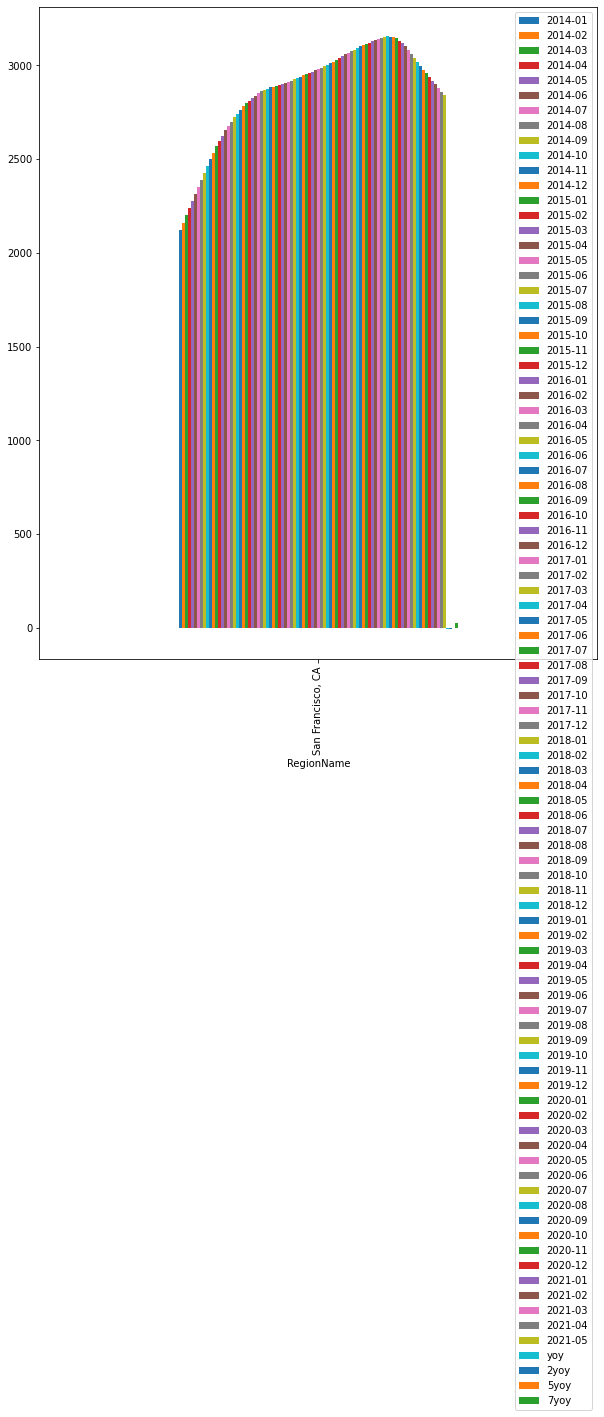

In [14]:
df_metro.filter(items=['San Francisco, CA'], axis='index').plot(kind = 'bar', figsize=(10,12))

In [15]:
dfSanFrancisco = df_metro.filter(items=['San Francisco, CA'], axis='index')

In [16]:
dfSanFrancisco.T.to_csv("SanFranciscoZORI.csv")

In [17]:
df_metro['yoy'].nlargest(10)

RegionName
Phoenix, AZ                  12.0
Atlanta, GA                   8.9
Detroit, MI                   7.5
Miami-Fort Lauderdale, FL     6.0
Cleveland, OH                 5.6
St. Louis, MO                 4.5
Dallas-Fort Worth, TX         4.4
Nashville, TN                 3.6
Philadelphia, PA              3.2
Austin, TX                    2.9
Name: yoy, dtype: float64

In [18]:
df_metro['yoy'].nsmallest(5)

RegionName
San Francisco, CA   -7.8
New York, NY        -7.5
Boston, MA          -4.4
Seattle, WA         -3.3
Washington, DC      -2.6
Name: yoy, dtype: float64

In [19]:
df_metro['2yoy'].nlargest(10)

RegionName
Phoenix, AZ                  19.8
Atlanta, GA                  12.7
Detroit, MI                  10.7
Cleveland, OH                 8.3
Miami-Fort Lauderdale, FL     8.1
St. Louis, MO                 8.1
Nashville, TN                 6.9
Dallas-Fort Worth, TX         6.4
Philadelphia, PA              5.4
United States                 4.4
Name: 2yoy, dtype: float64

In [20]:
df_metro['2yoy'].nsmallest(5)

RegionName
San Francisco, CA   -9.1
New York, NY        -9.0
Boston, MA          -4.5
Washington, DC      -2.5
Chicago, IL         -1.3
Name: 2yoy, dtype: float64

In [21]:
df_metro['5yoy'].nlargest(10)

RegionName
Phoenix, AZ                           44.4
Atlanta, GA                           33.1
Detroit, MI                           22.7
Dallas-Fort Worth, TX                 18.7
Nashville, TN                         17.9
Minneapolis-St Paul, MN               16.9
Los Angeles-Long Beach-Anaheim, CA    16.6
St. Louis, MO                         16.0
Denver, CO                            15.9
Miami-Fort Lauderdale, FL             15.7
Name: 5yoy, dtype: float64

In [22]:
df_metro['5yoy'].nsmallest(5)

RegionName
New York, NY        -4.1
San Francisco, CA   -0.9
Washington, DC       3.9
Boston, MA           4.8
Chicago, IL          5.2
Name: 5yoy, dtype: float64

In [23]:
df_metro['7yoy'].nlargest(10)

RegionName
Phoenix, AZ                           63.1
Atlanta, GA                           49.0
Denver, CO                            43.1
Nashville, TN                         38.1
Seattle, WA                           36.0
Los Angeles-Long Beach-Anaheim, CA    35.9
Dallas-Fort Worth, TX                 33.0
Detroit, MI                           31.2
Miami-Fort Lauderdale, FL             28.5
Minneapolis-St Paul, MN               28.2
Name: 7yoy, dtype: float64

In [24]:
df_metro['7yoy'].nsmallest(5)

RegionName
New York, NY       3.9
Washington, DC     9.9
Chicago, IL       12.9
Boston, MA        13.5
Houston, TX       17.0
Name: 7yoy, dtype: float64

In [25]:
df_metroPC = df_metro.T.pct_change(1).dropna().drop(index=['yoy','2yoy','5yoy','7yoy'])

In [26]:
df_metroPC.head()

RegionName,United States,"Atlanta, GA","Austin, TX","Boston, MA","Chicago, IL","Cleveland, OH","Dallas-Fort Worth, TX","Denver, CO","Detroit, MI","Houston, TX",...,"Miami-Fort Lauderdale, FL","Minneapolis-St Paul, MN","Nashville, TN","New York, NY","Philadelphia, PA","Phoenix, AZ","San Francisco, CA","Seattle, WA","St. Louis, MO","Washington, DC"
2014-02,0.005224,0.004505,0.008540,0.003486,0.003439,0.003052,0.006146,0.017937,0.002750,0.009354,...,0.005879,0.005059,0.011454,0.004996,0.003817,0.005192,0.018388,0.010671,0.003122,0.004427
2014-03,0.005197,0.004484,0.007621,0.003474,0.004112,0.003043,0.006108,0.017621,0.003656,0.009267,...,0.005195,0.005034,0.011324,0.004971,0.003042,0.005165,0.018056,0.009804,0.004149,0.004408
2014-04,0.005908,0.004464,0.007563,0.003956,0.004096,0.003033,0.006938,0.017316,0.002732,0.009182,...,0.005168,0.005843,0.010336,0.004946,0.003791,0.005139,0.017735,0.010456,0.003099,0.004937
2014-05,0.005140,0.004444,0.006672,0.003448,0.003399,0.003024,0.006029,0.016170,0.003633,0.009098,...,0.005784,0.004979,0.010230,0.004922,0.003021,0.005112,0.016979,0.009608,0.003090,0.003821
2014-06,0.005113,0.004425,0.007457,0.003436,0.003388,0.003015,0.005993,0.016750,0.002715,0.008197,...,0.005112,0.004955,0.010970,0.004898,0.003765,0.005086,0.016696,0.009517,0.003080,0.004350


<AxesSubplot:>

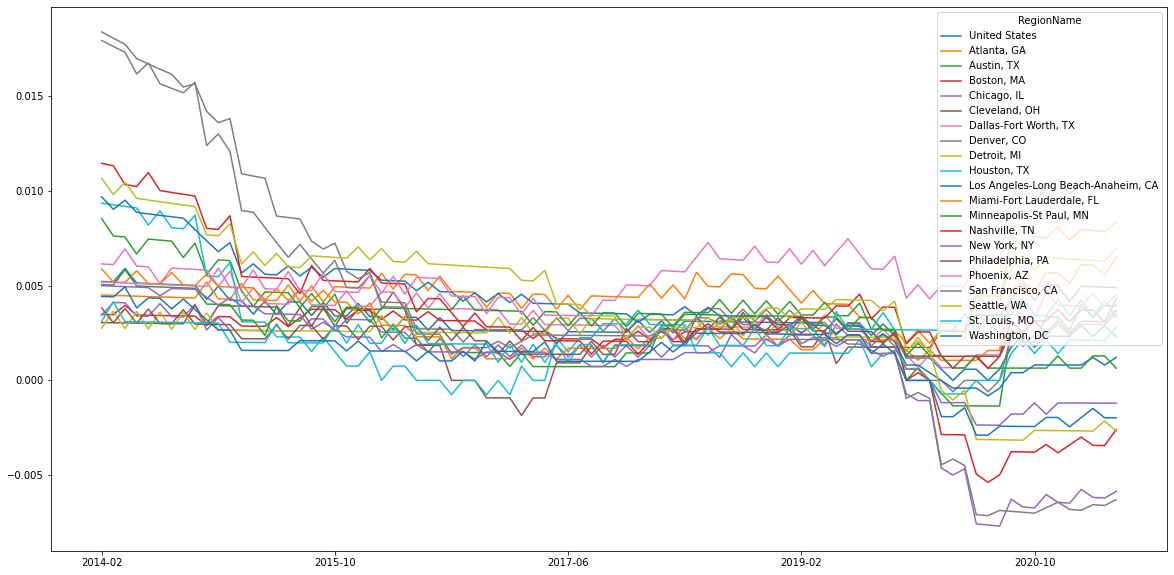

In [27]:
df_metroPC.plot(figsize = (20, 10))

In [28]:
# Divide each column by "20XX-XX".／各列を"20XX-XX"で割る。
df_metroP = round(df_metro.div(df_metro["2019-05"], axis=0)*100-100, 1)
df_metroP.head()

,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,2014-07,2014-08,2014-09,2014-10,...,2020-12,2021-01,2021-02,2021-03,2021-04,2021-05,yoy,2yoy,5yoy,7yoy
RegionName,,,,,,,,,,,,,,,,,,,,,
United States,-19.6,-19.2,-18.8,-18.3,-17.9,-17.5,-17.0,-16.6,-16.2,-15.8,...,3.1,3.3,3.6,3.8,4.1,4.4,-99.9,-99.7,-99.1,-98.4
"Atlanta, GA",-25.7,-25.4,-25.0,-24.7,-24.4,-24.0,-23.7,-23.4,-23.0,-22.7,...,8.4,9.2,10.0,10.9,11.8,12.7,-99.4,-99.1,-97.8,-96.7
"Austin, TX",-20.2,-19.5,-18.9,-18.3,-17.7,-17.1,-16.5,-15.9,-15.3,-14.7,...,2.2,2.5,2.9,3.3,3.7,4.1,-99.8,-99.7,-99.1,-98.2
"Boston, MA",-17.0,-16.7,-16.4,-16.1,-15.8,-15.5,-15.2,-15.0,-14.7,-14.4,...,-2.9,-3.3,-3.6,-3.9,-4.2,-4.5,-100.2,-100.2,-99.8,-99.4
"Chicago, IL",-13.9,-13.6,-13.2,-12.9,-12.6,-12.3,-11.9,-11.6,-11.3,-11.0,...,-0.7,-0.8,-0.9,-1.1,-1.2,-1.3,-100.1,-100.1,-99.7,-99.2


In [29]:
df_metroP['2021-05'].nlargest(21)

RegionName
Phoenix, AZ                           19.8
Atlanta, GA                           12.7
Detroit, MI                           10.7
Cleveland, OH                          8.3
St. Louis, MO                          8.1
Miami-Fort Lauderdale, FL              8.1
Nashville, TN                          6.9
Dallas-Fort Worth, TX                  6.4
Philadelphia, PA                       5.4
United States                          4.4
Austin, TX                             4.1
Denver, CO                             4.0
Minneapolis-St Paul, MN                3.3
Houston, TX                            2.5
Los Angeles-Long Beach-Anaheim, CA     2.0
Chicago, IL                           -1.3
Seattle, WA                           -1.3
Washington, DC                        -2.5
Boston, MA                            -4.5
New York, NY                          -9.0
San Francisco, CA                     -9.1
Name: 2021-05, dtype: float64

In [30]:
sdf_metro = df_metro.T.drop(index=['yoy','2yoy','5yoy','7yoy'])

In [31]:
!pip install seaborn

In [32]:
import seaborn as sns
sns.set(font='DejaVu Sans')

<AxesSubplot:>

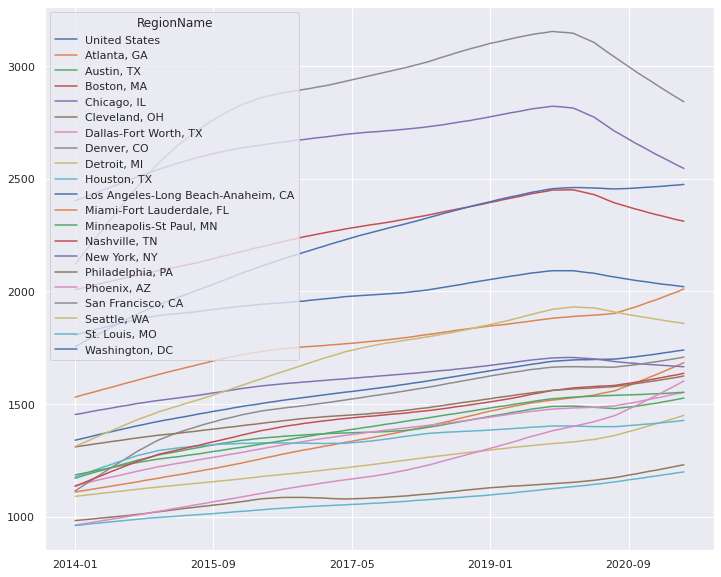

In [33]:
sdf_metro.plot(figsize = (12, 10))

In [34]:
covidimpact_rent = df_metroP.T

In [35]:
covidimpact_rent.to_csv("covid_impact_rent.csv")

<AxesSubplot:>

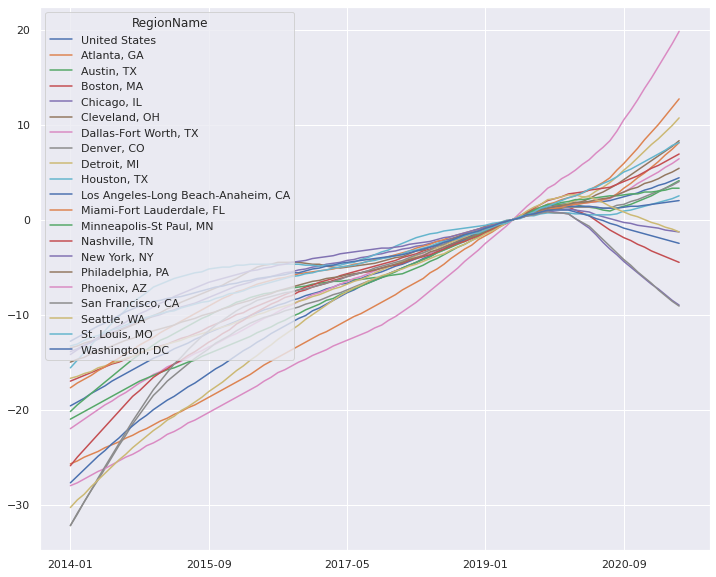

In [36]:
covidimpact_rent.drop(index=['yoy','2yoy','5yoy','7yoy']).plot(figsize = (12, 10))